In [2]:
import numpy as np
import xarray as xr
from glob import glob
NAME_VAR="pr"
patterns_original = [
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2000**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2001**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2002**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2003**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2004**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2005**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2006**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2007**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2008**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2009**zoom.grb2*', 
            ]
patterns_remapped = [
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2000**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2001**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2002**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2003**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2004**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2005**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2006**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2007**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2008**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2009**zoom_remapped.grb2*', 
            ]

# Use glob to find files matching any of the specified patterns
matching_files = []
for pattern in patterns_original:
    matching_files.extend(glob(pattern))


In [3]:
# list_yyyy_mm=[f'2005{m}' for m in ['01','02','03','04','05','06','07','08','09','10','11','12']]
# for YYYY_MM in tqdm(list_yyyy_mm,total=len(list_yyyy_mm)):
# ll_files=np.array(matching_files)[[('idx' not in xx) and ('2020' not in xx) for xx in matching_files]]
ll_files=np.array(matching_files)[[('idx' not in xx) and ('2020' not in xx) for xx in matching_files]]
ll_files


array(['/mnt/beegfs/lcesarini/SPHERA/original/pr/200003_ten3_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200009_ten3_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200011_ten3_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200010_ten1_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200012_ten2_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200008_ten3_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200009_ten1_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200007_ten2_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200002_ten2_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200012_ten1_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200003_ten2_Tdeep_tpH_zoom.grb2',
       '/mnt/beegfs/lcesarini/SPHERA/original/pr/200005_ten1_Tdeep_tpH_zoom.grb2',
    

In [4]:
ds_ori=xr.open_mfdataset(ll_files,engine='cfgrib')


In [6]:
ds_one_cell=ds_ori.isel(x=111,y=121)
ds_one_cell

<xarray.Dataset>
Dimensions:     (time: 87543, step: 24)
Coordinates:
  * time        (time) datetime64[ns] 2000-01-01T01:00:00 ... 2010-01-01
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 0.0
    latitude    float64 dask.array<chunksize=(), meta=np.ndarray>
    longitude   float64 dask.array<chunksize=(), meta=np.ndarray>
    valid_time  (time, step) datetime64[ns] dask.array<chunksize=(360, 24), meta=np.ndarray>
Data variables:
    tp          (time, step) float32 dask.array<chunksize=(360, 24), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2024-03-31T10:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
ds_one_cell=ds_one_cell.load()

: 

In [ ]:
np.nanquantile(ds_ori.isel(step=0).tp,q=0.99)

In [94]:

sphera=xr.open_mfdataset("/mnt/beegfs/lcesarini/SPHERA/decumulated/*.nc")

In [96]:
sphera=sphera.load()

In [100]:
sphera_jja=sphera.sel(time=sphera['time.season'].isin('JJA'))

In [101]:
sphera_wh=xr.where(sphera_jja > 0.1, sphera_jja,np.nan )
sphera_wh_avg=sphera_wh.groupby(sphera_wh["time.hour"]).mean()
sphera_wh_avg=sphera_wh_avg.mean(dim=["latitude","longitude"]).load()


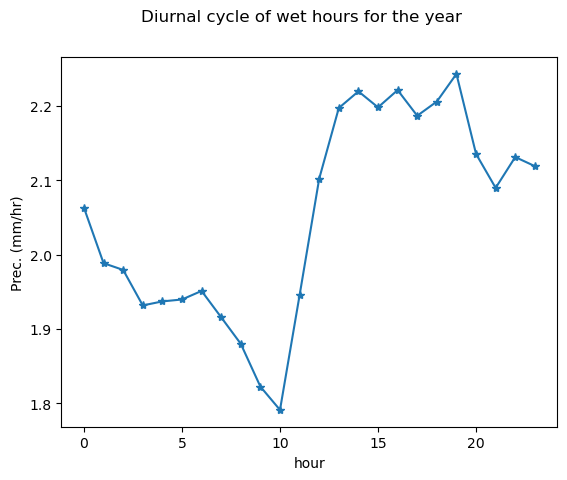

In [102]:
import matplotlib.pyplot as plt
sphera_wh_avg.pr.plot(marker='*')
plt.ylabel("Prec. (mm/hr)")
plt.suptitle(f"Diurnal cycle of wet hours for the year")
plt.show()

In [108]:
def get_q_by_h(ds,Q):
    x=ds.groupby(ds["time.hour"]).quantile(q=Q)
    if "longitude" in ds.coords:
        return x.mean(dim=["longitude","latitude"])
    else:
        return x.mean(dim=["x","y"])



In [114]:
import seaborn as sns
np.sum(sphera_jja.isel(longitude=1,latitude=1).pr.values > 0)

676

/home/luigi.cesarini/.conda/envs/my_xclim_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


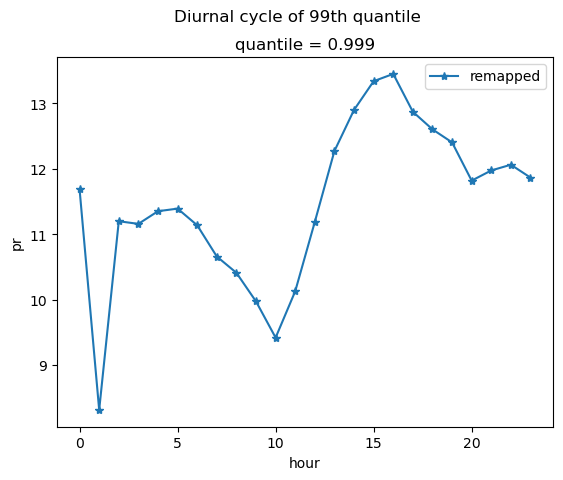

In [109]:
ds_q_remapped=get_q_by_h(sphera_jja,0.999)

ds_q_remapped.pr.plot(marker='*',label='remapped')
plt.suptitle(f"Diurnal cycle of 99th quantile")
plt.legend()
plt.show()

In [92]:
xr.open_dataset("/mnt/beegfs/lcesarini/SPHERA/decumulated/SPHERA_200711.nc").pr.min()

<xarray.DataArray 'pr' ()>
array(-0.0078125)

In [66]:
ds_ori=xr.open_mfdataset(ll_files,engine="cfgrib")
ds_ori

Ignoring index file '/mnt/beegfs/lcesarini/SPHERA/original/pr/200001_ten3_Tdeep_tpH_zoom_remapped.grb2.923a8.idx' incompatible with GRIB file


Ignoring index file '/mnt/beegfs/lcesarini/SPHERA/original/pr/200001_mid1_Tdeep_tpH_zoom_remapped.grb2.923a8.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:     (time: 696, step: 24, latitude: 158, longitude: 272)
Coordinates:
  * time        (time) datetime64[ns] 2000-01-01T01:00:00 ... 2000-01-30
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 43.25 43.28 43.3 43.33 ... 47.51 47.54 47.57
  * longitude   (longitude) float64 6.5 6.527 6.555 6.582 ... 13.9 13.92 13.95
    valid_time  (time, step) datetime64[ns] dask.array<chunksize=(360, 24), meta=np.ndarray>
Data variables:
    tp          (time, step, latitude, longitude) float32 dask.array<chunksize=(360, 24, 158, 272), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2024-03-28T14:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [67]:
list_timestamps=ds_ori.time.values
list_steps=[str(timestamp)[11:19] for timestamp in ds_ori.time.values]

print(len(list_steps),len(list_timestamps))

696 696


In [68]:
ds_ori=ds_ori.load()

In [74]:
ll_dsds_2=[]
for i in np.arange(len(list_timestamps)):
    STEP=list_steps[i]
    if STEP == "01:00:00":
        ll_dsds_2.append(ds_ori.sel(
            time=list_timestamps[i],
            step=STEP).tp.drop_vars(['time','step','valid_time','surface'])
            )
    elif STEP == "00:00:00":
        ll_dsds_2.append((ds_ori.sel(
            time=list_timestamps[i],
            step="24:00:00")-ds_ori.sel(
                time=list_timestamps[i-1],
                step="23:00:00")).tp.drop_vars('surface'))
    else:
        ll_dsds_2.append((ds_ori.sel(
            time=list_timestamps[i],
            step=list_steps[i])-ds_ori.sel(
                time=list_timestamps[i-1],
                step=list_steps[i-1])).tp.drop_vars('surface'))

new_ds=xr.concat(ll_dsds_2,dim='time')
new_ds['time']=ds_ori.time.values
new_ds=new_ds.sortby('time').load()

print(new_ds['time'].shape)


(696,)


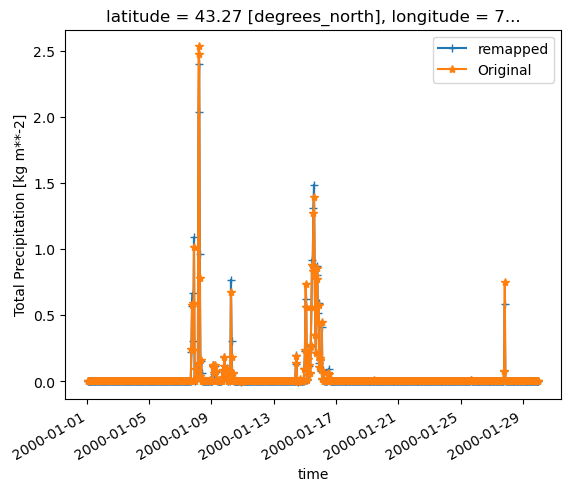

In [76]:

new_ds.isel(longitude=28,latitude=0).plot(label='remapped',marker='+')
ori_ds.isel(x=28,y=0).plot(label='Original',marker='*')
plt.legend()

In [59]:
print(
    f"""
    {ds_ori.isel(time=np.arange(322,323),step=10,x=28,y=0).tp.time}{ds_ori.isel(time=np.arange(322,323),step=10,x=28,y=0).tp.values.item()},
    {ds_ori.isel(time=np.arange(323,324),step=11,x=28,y=0).tp.values.item()},
    {ds_ori.isel(time=np.arange(324,325),step=12,x=28,y=0).tp.values.item()},
    {ds_ori.isel(time=np.arange(325,326),step=13,x=28,y=0).tp.values.item()},
    {ds_ori.isel(time=np.arange(326,327),step=14,x=28,y=0).tp.values.item()}
    """
)
# ds_ori.isel(time=np.arange(322,327),longitude=28,latitude=0)


    <xarray.DataArray 'time' (time: 1)>
array(['2000-01-14T11:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 2000-01-14T11:00:00
    step        timedelta64[ns] 11:00:00
    surface     float64 0.0
    latitude    float64 43.27
    longitude   float64 7.28
    valid_time  (time) datetime64[ns] 2000-01-14T22:00:00
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time0.3359375,
    0.3359375,
    0.328125,
    0.328125,
    0.328125
    


In [55]:
print(
    f"""
    {ds_ori.isel(time=np.arange(322,323),step=10,longitude=28,latitude=0).tp.values.item()},
    {ds_ori.isel(time=np.arange(323,324),step=11,longitude=28,latitude=0).tp.values.item()},
    {ds_ori.isel(time=np.arange(324,325),step=12,longitude=28,latitude=0).tp.values.item()},
    {ds_ori.isel(time=np.arange(325,326),step=13,longitude=28,latitude=0).tp.values.item()},
    {ds_ori.isel(time=np.arange(326,327),step=14,longitude=28,latitude=0).tp.values.item()}
    """
)
# ds_ori.isel(time=np.arange(322,327),longitude=28,latitude=0)

ValueError: Dimensions {'longitude', 'latitude'} do not exist. Expected one or more of Frozen({'time': 696, 'step': 24, 'y': 214, 'x': 260})

In [45]:
ds_ori.isel(time=np.arange(326,327),step=14,longitude=28,latitude=0).tp.values.item()-ds_ori.isel(time=np.arange(326,327),step=13,longitude=28,latitude=0).tp.values.item()

nan

In [36]:
ds_ori.isel(time=np.arange(322,327),longitude=28,latitude=0)
# ds_ori.isel(time=np.arange(322,327),longitude=28,latitude=0)

<xarray.Dataset>
Dimensions:     (time: 5, step: 24)
Coordinates:
  * time        (time) datetime64[ns] 2000-01-14T11:00:00 ... 2000-01-14T15:0...
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 0.0
    latitude    float64 43.25
    longitude   float64 7.27
    valid_time  (time, step) datetime64[ns] 2000-01-14T12:00:00 ... 2000-01-1...
Data variables:
    tp          (time, step) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2024-03-28T12:15 GRIB to CDM+CF via cfgrib-0.9.1...

In [83]:

def get_q_by_h(ds):
    x=ds.groupby(ds["time.hour"]).quantile(q=0.99)
    if "longitude" in ds.coords:
        return x.mean(dim=["longitude","latitude"])
    else:
        return x.mean(dim=["x","y"])


def get_avg_by_h(ds):
    ds_wh=xr.where(ds > 0.1, ds,np.nan )
    ds_wh_avg=ds_wh.groupby(ds_wh["time.hour"]).mean()
    if "longitude" in ds.coords:
        return ds_wh_avg.mean(dim=["longitude","latitude"])
    else:
        return ds_wh_avg.mean(dim=["x","y"])

    ds_avg=test_slice_avg.mean(dim=["latitude","longitude"]).load()



In [89]:
new_ds.isel(longitude=0,latitude=28)[new_ds.isel(longitude=0,latitude=28) > 0.1]

<xarray.DataArray 'tp' (time: 4)>
array([0.28271484, 0.1171875 , 0.14370728, 0.770874  ], dtype=float32)
Coordinates:
    latitude   float64 44.02
    longitude  float64 6.5
  * time       (time) datetime64[ns] 2000-01-15T14:00:00 ... 2000-01-27T20:00:00
Attributes: (12/29)
    GRIB_paramId:                             228228
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      42976
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_name:                                Total Precipitation
    GRIB_shortName:                           tp
    GRIB_units:                               kg m**-2
    long_name:                                Total Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

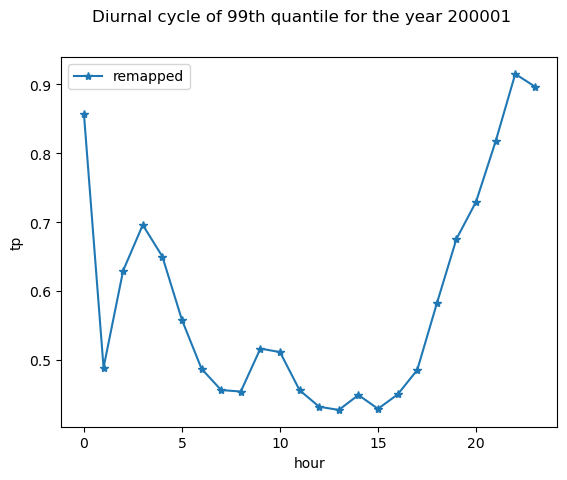

In [85]:
ds_avg_remapped=get_avg_by_h(new_ds)
ds_avg_remapped.plot(marker='*',label='remapped')
plt.suptitle(f"Diurnal cycle of 99th quantile for the year {YYYY_MM}")
plt.legend()
plt.show()

In [79]:
ds_q_remapped=get_q_by_h(new_ds)
ds_q_remapped


/home/luigi.cesarini/.conda/envs/my_xclim_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<xarray.DataArray 'tp' (hour: 24)>
array([0.57314277, 0.1879142 , 0.38261894, 0.415492  , 0.3850718 ,
       0.3398843 , 0.305374  , 0.27106906, 0.26094606, 0.28632557,
       0.27837464, 0.24043242, 0.22660466, 0.24494786, 0.27511748,
       0.3019387 , 0.35756376, 0.42396699, 0.49923329, 0.5623924 ,
       0.61083115, 0.65632646, 0.64840896, 0.61558833])
Coordinates:
    quantile  float64 0.99
  * hour      (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

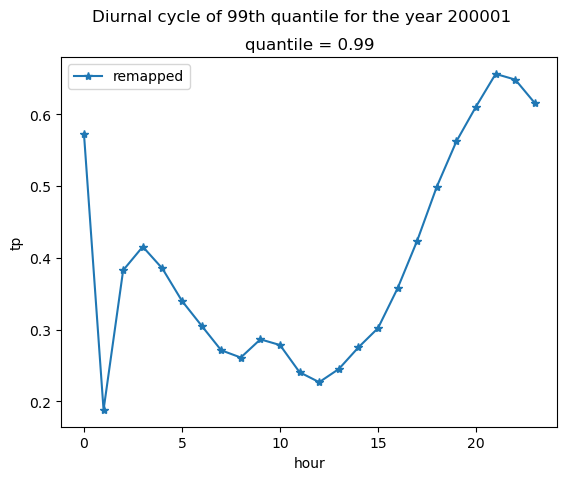

In [81]:
# xxx=test_slice.groupby(test_slice["time.hour"]).quantile(q=0.99)
# xxxx=xxx.mean(dim=["x","y"])
# ds_q_original=get_q_by_h(test_slice)
# ds_q_original=xxxx#get_q_by_h(test_slice)


# ds_q_original.pr.plot(marker='*',label='original')
ds_q_remapped.plot(marker='*',label='remapped')
plt.suptitle(f"Diurnal cycle of 99th quantile for the year {YYYY_MM}")
plt.legend()
plt.show()


In [30]:
np.argwhere((new_ds == -0.0078125).values)

array([[324,   0,  28],
       [324,   0, 236],
       [324,   0, 237],
       [324,   1, 199],
       [324,   3,  25],
       [324,   3, 258],
       [324,   5,  59],
       [324,   6,  59],
       [324,   6,  60],
       [324,   8, 196],
       [324,   9,  20],
       [324,  19, 261],
       [324,  33, 247],
       [324,  33, 258],
       [324,  37, 262],
       [324,  38, 128],
       [324,  41, 262],
       [324,  47, 164],
       [324,  48, 186],
       [324,  48, 211],
       [324,  48, 212],
       [324,  49, 186],
       [324,  50, 186],
       [324,  52, 161],
       [324,  52, 176],
       [324,  54, 222],
       [324,  54, 245],
       [324,  55, 181],
       [324,  56, 141],
       [324,  56, 147],
       [324,  56, 182],
       [324,  56, 183],
       [324,  56, 184],
       [324,  56, 219],
       [324,  57, 177],
       [324,  57, 178],
       [324,  57, 179],
       [324,  57, 183],
       [324,  57, 219],
       [324,  57, 238],
       [324,  58, 140],
       [324,  58

In [ ]:
list_yyyy_mm=[f'2005{m}' for m in ['01','02','03','04','05','06','07','08','09','10','11','12']]
for YYYY_MM in tqdm(list_yyyy_mm,total=len(list_yyyy_mm)):
    # ll_files=np.array(matching_files)[[('idx' not in xx) and ('2020' not in xx) for xx in matching_files]]
    ll_files=np.array(matching_files)[[(YYYY_MM in xx) and ('idx' not in xx) and ('2020' not in xx) for xx in matching_files]]

    ds_ori=xr.open_mfdataset(ll_files,engine='cfgrib')

    # for timestamp in ds_ori.time.values:
    #     print(str(timestamp)[11:19])
    #     if str(timestamp)[11:19] == "00:00:00":
    #         print(ds_ori.sel(time=timestamp,step="24:00:00").tp.values)
    #     else:
    #         print(ds_ori.sel(time=timestamp,step=str(timestamp)[11:19]).tp.values)



    ll_dsds_2=[]
    # for i,t in  zip(np.tile(np.arange(0,24),int(ds_ori_slice.tp.shape[0]/24)),np.arange(ds_ori_slice.tp.shape[0])):
    list_timestamps=ds_ori.time.values
    list_steps=[str(timestamp)[11:19] for timestamp in ds_ori.time.values]

    print(len(list_steps),len(list_timestamps))

    for i in np.arange(len(list_timestamps)):
        STEP=list_steps[i]
        if STEP == "01:00:00":
            ll_dsds_2.append(ds_ori.sel(
                time=list_timestamps[i],
                step=STEP).tp.drop_vars(['time','step','valid_time','surface'])
                )
        elif STEP == "00:00:00":
            ll_dsds_2.append((ds_ori.sel(
                time=list_timestamps[i],
                step="24:00:00")-ds_ori.sel(
                    time=list_timestamps[i-1],
                    step="23:00:00")).tp.drop_vars('surface'))
        else:
            ll_dsds_2.append((ds_ori.sel(
                time=list_timestamps[i],
                step=list_steps[i])-ds_ori.sel(
                    time=list_timestamps[i-1],
                    step=list_steps[i-1])).tp.drop_vars('surface'))

            
    new_ds=xr.concat(ll_dsds_2,dim='time')
    new_ds['time']=ds_ori.time.values
    new_ds=new_ds.sortby('time').load()

    print(new_ds['time'].shape)


    if "remapped" in ll_files[0]:
        new_ds.assign_attrs(ds_ori.attrs).to_dataset(name='pr',promote_attrs=True).to_netcdf(f"/mnt/data/lcesarini/SPHERA_{YYYY_MM}.nc",encoding={'pr':{'zlib':True}})
    else:
        new_ds.assign_attrs(ds_ori.attrs).to_dataset(name='pr',promote_attrs=True).to_netcdf(f"/mnt/data/lcesarini/SPHERA_{YYYY_MM}_original.nc",encoding={'pr':{'zlib':True}})



In [13]:
import numpy as np
Q=[10,20,30]

'_'.join(np.array(Q).astype(str))


'10_20_30'

In [1]:
#! /home/lcesarini/miniconda3/envs/my_xclim_env/bin/python
import os
os.environ['USE_PYGEOS'] = '0'
import sys
sys.path.append("/mnt/beegfs/lcesarini/2022_resilience/")
import argparse
import rioxarray
import subprocess
import numpy as np 
import xarray as xr 
import pandas as pd
from glob import glob
from tqdm import tqdm
import geopandas as gpd
import matplotlib as mpl
from random import sample
# import xarray.ufuncs as xu 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
from shapely.geometry import mapping
from cartopy import feature as cfeature
from math import pi,sin,cos, asin, atan2
from sklearn.metrics import (mean_absolute_error,mean_squared_error,
                             r2_score,mean_absolute_percentage_error)

import warnings
warnings.filterwarnings('ignore')

from resilience.utils import *

cmap_f,cmap_i,cmap_q=get_palettes()
lvl_f,lvl_i,lvl_q=get_levels()

os.chdir("/mnt/beegfs/lcesarini/2022_resilience/")

gripho=xr.open_dataset("/mnt/beegfs/lcesarini/DATA_FPS/gripho-v1_1h_TSmin30pct_2001-2016_cut3km.nc")
gripho

<xarray.Dataset>
Dimensions:  (time: 140256, y: 402, x: 353)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T00:22:30 ... 2016-12-31T23:00:00
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
  * x        (x) float64 4.05e+06 4.053e+06 4.056e+06 ... 5.103e+06 5.106e+06
  * y        (y) float64 1.505e+06 1.508e+06 1.511e+06 ... 2.705e+06 2.708e+06
Data variables:
    crs      int32 ...
    pr       (time, y, x) float32 ...
Attributes: (12/22)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    Conventions:                    CF-1.7
    history:                        Fri Mar 19 12:49:39 2021: cdo -L -z zip -...
    source:                         Precipitation data from in-situ stations ...
    institution:                    ICTP
    crs:                            +proj=laea +lat_0=52 +lon_0=10 +x_0=43210...
    ...                             ...
    title:                          GRIPHO - GRidded Italian Precipitation Ho...
    contact:                        afantini@ictp.it
    references:                     Fantini et al. (2019, in publication)
    version:                        v1.0
    years_available:                2001-2016
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [16]:
xr.load_dataset("/mnt/beegfs/lcesarini/2022_resilience/output/diurnal/pr/JJA/diurnal_SPHERA_pr_0.5_0.6_0.7_0.8_0.9.nc")

<xarray.Dataset>
Dimensions:   (quantile: 5, hour: 24)
Coordinates:
  * quantile  (quantile) float64 0.5 0.6 0.7 0.8 0.9
  * hour      (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Data variables:
    pr        (hour, quantile) float64 0.0 0.0 2.539e-05 ... 0.005409 0.103

In [22]:
name_models=['ICTP','ETH','KIT','CMCC','CNRM','KNMI','HCLIMcom','SPHERA']
PATH_OUT_DIURNAL="/mnt/beegfs/lcesarini/2022_resilience/output/diurnal"
ENV_VAR="pr"
S="JJA"
Q=[0.5, 0.6, 0.7, 0.8, 0.9]


ll_pr=[xr.load_dataset(f'{PATH_OUT_DIURNAL}/{ENV_VAR}/{S}/diurnal_{NAME}_{ENV_VAR}_{"_".join(np.array(Q).astype(str))}.nc') for NAME in name_models]
ll_pr[1].pr.isel(quantile=0)

<xarray.DataArray 'pr' (hour: 24)>
array([4.91273973e-11, 1.78067167e-11, 9.88185894e-12, 5.39535988e-12,
       1.51641410e-12, 3.29883239e-13, 4.74517703e-14, 5.64508616e-14,
       3.41615101e-13, 7.95331908e-12, 4.96331184e-10, 7.47333975e-08,
       1.06949360e-06, 6.17460995e-06, 1.79159133e-05, 1.35664729e-05,
       5.94971698e-06, 2.89916535e-06, 1.04554185e-06, 1.36797639e-07,
       3.77728522e-08, 8.17874831e-09, 1.36416729e-09, 1.76379270e-10])
Coordinates:
    quantile  float64 0.5
  * hour      (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

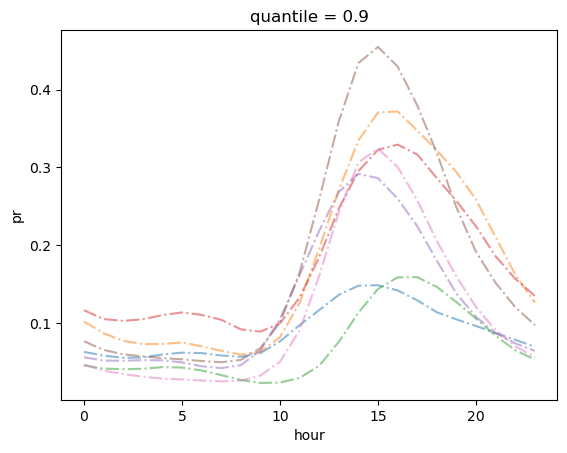

In [27]:
ax=plt.axes()
[ll_pr[i].pr.isel(quantile=4).plot(label=name_models[i],ax=ax,alpha=0.5,linestyle='-.') for i in range(len(name_models)-1)]
plt.show()

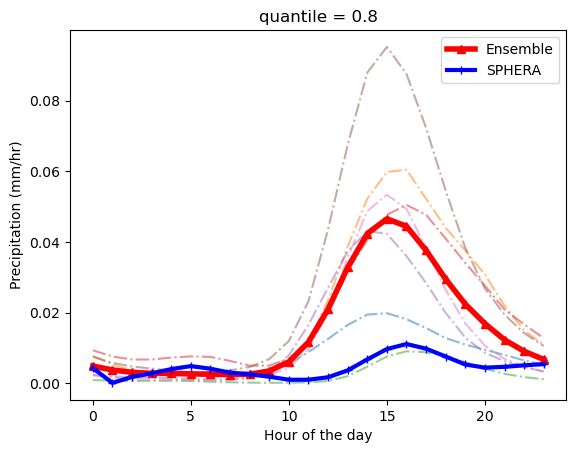

In [31]:
ax=plt.axes()
[ll_pr[i].pr.isel(quantile=3).plot(
    # label=name_models[i],
    ax=ax,alpha=0.5,linestyle='-.') for i in range(len(name_models)-1)]

xr.concat(ll_pr[:-1],'model').isel(quantile=3).mean(dim='model').pr.plot(label="Ensemble",ax=ax,marker='^', linewidth=4,color='red')
ll_pr[len(name_models)-1].isel(quantile=3).pr.plot(label="SPHERA",ax=ax,marker='+',linestyle='-', linewidth=3,color='blue')

# ax.set_title(f"Heavy Precipitation ({'9.9' if Q == 0.999 else '99'}th percentile) by hour {S}")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Precipitation (mm/hr)")
plt.legend()
# plt.show()
# plt.close()
# plt.savefig(f"figures/q{'999' if Q == 0.999 else '99'}_hourly_{ENV_VAR}_{S}.png",dpi=300,bbox_inches="tight")
# plt.close()

In [2]:
import xarray as xr
xr.open_dataset("/mnt/beegfs/lcesarini/DATA_FPS/reanalysis/SPHERA/pr/200403_ten2_Tdeep_tpH_zoom.nc")

<xarray.Dataset>
Dimensions:    (time: 240, latitude: 158, longitude: 272)
Coordinates:
  * time       (time) datetime64[ns] 2004-03-11T01:00:00 ... 2004-03-21
    surface    float64 ...
  * latitude   (latitude) float64 43.25 43.28 43.3 43.33 ... 47.51 47.54 47.57
  * longitude  (longitude) float64 6.5 6.527 6.555 6.582 ... 13.9 13.92 13.95
Data variables:
    pr         (time, latitude, longitude) float64 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach 
    history:                 2023-03-08T13:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [2]:
gripho_nord=xr.load_dataset("/mnt/beegfs/lcesarini/DATA_FPS/gripho_ori_clipped.nc")
gripho_nord

<xarray.Dataset>
Dimensions:  (time: 140256, y: 157, x: 198)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T00:22:30 ... 2016-12-31T23:00:00
    lon      (y, x) float32 6.673 6.71 6.747 6.783 ... 14.12 14.16 14.2 14.24
    lat      (y, x) float32 43.21 43.21 43.22 43.22 ... 47.41 47.41 47.4 47.4
  * x        (x) float64 4.05e+06 4.053e+06 4.056e+06 ... 4.638e+06 4.641e+06
  * y        (y) float64 2.24e+06 2.243e+06 2.246e+06 ... 2.705e+06 2.708e+06
Data variables:
    crs      int32 1
    pr       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/22)
    CDI:                            Climate Data Interface version 2.1.1 (htt...
    Conventions:                    CF-1.7
    source:                         Precipitation data from in-situ stations ...
    institution:                    ICTP
    history:                        Thu Mar 21 15:50:20 2024: cdo sellonlatbo...
    crs:                            +proj=laea +lat_0=52 +lon_0=10 +x_0=43210...
    ...                             ...
    title:                          GRIPHO - GRidded Italian Precipitation Ho...
    contact:                        afantini@ictp.it
    references:                     Fantini et al. (2019, in publication)
    version:                        v1.0
    years_available:                2001-2016
    CDO:                            Climate Data Operators version 2.1.1 (htt...

In [3]:
gr_n_yrs=gripho_nord.sel(time=gripho_nord.time.dt.year.isin(np.arange(2001,2011)))
gr_n_jja=gr_n_yrs.sel(time=gr_n_yrs.time.dt.season.isin("JJA"))
gr_n_djf=gr_n_yrs.sel(time=gr_n_yrs.time.dt.season.isin("DJF"))

In [4]:
gr_n_jja

<xarray.Dataset>
Dimensions:  (time: 22080, y: 157, x: 198)
Coordinates:
  * time     (time) datetime64[ns] 2001-06-01T00:22:30 ... 2010-08-31T23:22:30
    lon      (y, x) float32 6.673 6.71 6.747 6.783 ... 14.12 14.16 14.2 14.24
    lat      (y, x) float32 43.21 43.21 43.22 43.22 ... 47.41 47.41 47.4 47.4
  * x        (x) float64 4.05e+06 4.053e+06 4.056e+06 ... 4.638e+06 4.641e+06
  * y        (y) float64 2.24e+06 2.243e+06 2.246e+06 ... 2.705e+06 2.708e+06
Data variables:
    crs      int32 1
    pr       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/22)
    CDI:                            Climate Data Interface version 2.1.1 (htt...
    Conventions:                    CF-1.7
    source:                         Precipitation data from in-situ stations ...
    institution:                    ICTP
    history:                        Thu Mar 21 15:50:20 2024: cdo sellonlatbo...
    crs:                            +proj=laea +lat_0=52 +lon_0=10 +x_0=43210...
    ...                             ...
    title:                          GRIPHO - GRidded Italian Precipitation Ho...
    contact:                        afantini@ictp.it
    references:                     Fantini et al. (2019, in publication)
    version:                        v1.0
    years_available:                2001-2016
    CDO:                            Climate Data Operators version 2.1.1 (htt...

TypeError: 'fontdict' is an invalid keyword argument for enumerate()

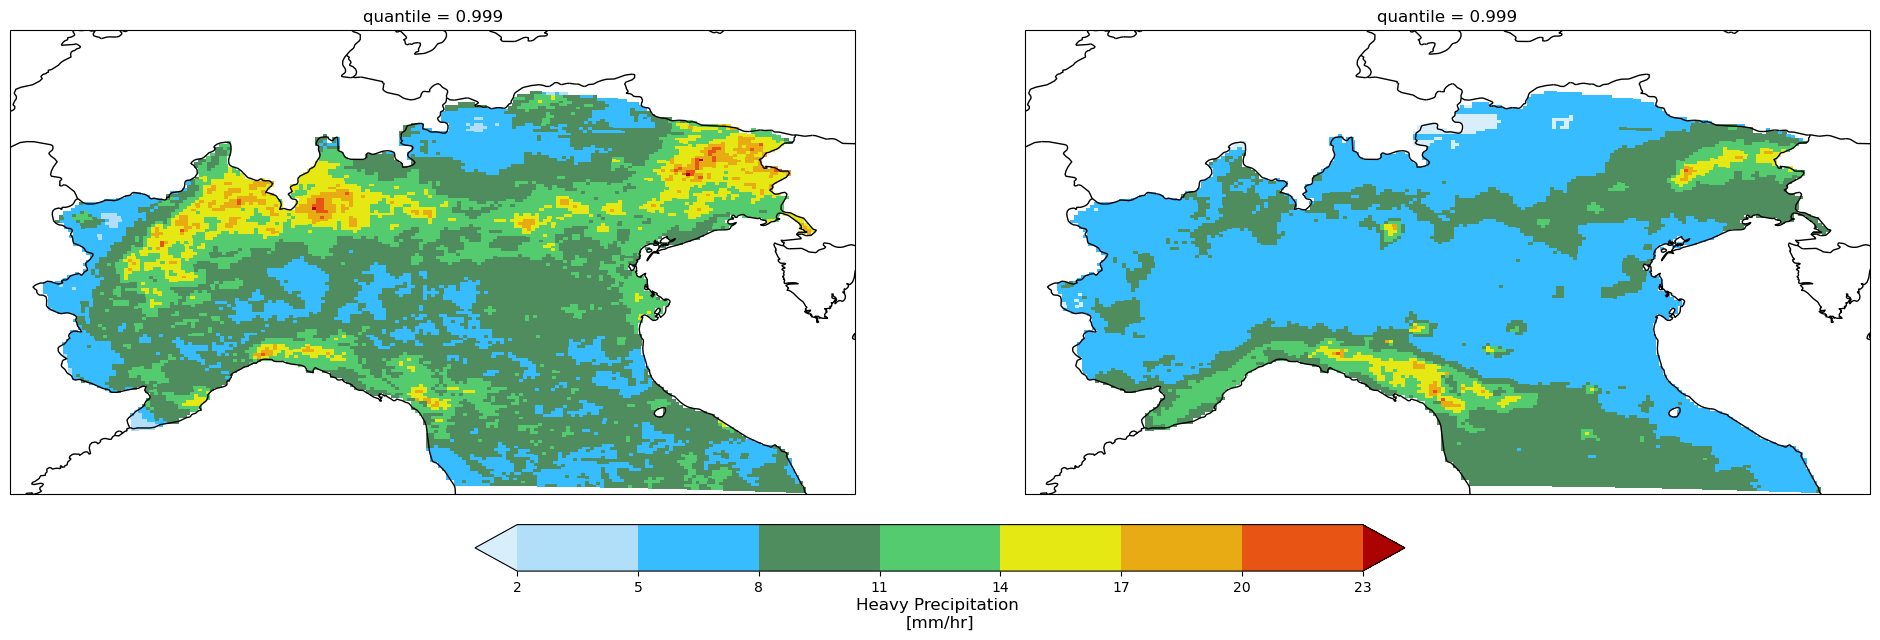

In [28]:
proj=ccrs.LambertAzimuthalEqualArea(central_latitude=52,
                                    central_longitude=10,
                                    false_easting=4321000,
                                    false_northing=3210000)

tran=ccrs.PlateCarree()


fig,ax=plt.subplots(1,2,figsize=(24,16),subplot_kw={"projection":tran})
pcm=gr_n_jja.pr.quantile(dim='time',q=0.999).plot(
    ax=ax[0],transform=proj,cmap=cmap_q,levels=np.arange(2,26,3),add_colorbar=False
    )
pcm_2=gr_n_djf.pr.quantile(dim='time',q=0.999).plot(
    ax=ax[1],transform=proj,cmap=cmap_q,levels=np.arange(2,26,3),add_colorbar=False
    )

cbar=fig.colorbar(pcm,ax=ax, 
                extend='both', 
                shrink=0.5,
                orientation='horizontal',
                pad=0.025)
# cbar.ax.tick_params(labelsize=30)
cbar.ax.set_xlabel("Heavy Precipitation \n[mm/hr]",
                fontsize=12,rotation=0,loc='center',labelpad=2)

# cbar=fig.colorbar(pcm,ax=ax, 
#                 extend='both', 
#                 shrink=0.5,
#                 orientation='horizontal',
#                 pad=0.025)
# # cbar.ax.tick_params(labelsize=30)
# cbar.ax.set_xlabel("Convective available potential energy \n[J kg**-1]",
#                 fontsize=12,rotation=0,loc='center',labelpad=2)

[ax[_].coastlines() for _ in range(ax.shape[0])]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(ax.shape[0])]
[ax[_].set_title(f"{tt}") for _,tt in enumerate(["JJA","DJF"],fontdict={'size':20})]


In [49]:
q_sta=xr.open_dataset("/mnt/beegfs/lcesarini/2022_resilience/output/JJA/STATIONS_q.nc")
q_sph=xr.open_dataset("/mnt/beegfs/lcesarini/2022_resilience/output/JJA/SPHERA_q.nc")
q_sta=xr.open_dataset("/mnt/beegfs/lcesarini/2022_resilience/output/DJF/STATIONS_q.nc")
q_sph=xr.open_dataset("/mnt/beegfs/lcesarini/2022_resilience/output/DJF/SPHERA_q.nc")

q_sta

<xarray.Dataset>
Dimensions:   (lat: 88, lon: 99, quantile: 1)
Coordinates:
  * lat       (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
  * lon       (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
  * quantile  (quantile) float64 0.999
Data variables:
    pr        (quantile, lat, lon) float64 ...

In [51]:
sph_tri=crop_to_extent(q_sph,10.4,13.1,44.71,47.1)
gri_tri=crop_to_extent(gr_n_jja,10.4,13.1,44.71,47.1).pr.quantile(dim='time',q=0.999)
gri_tri=crop_to_extent(gr_n_djf,10.4,13.1,44.71,47.1).pr.quantile(dim='time',q=0.999)

In [53]:
sph_tri=(xr.where(np.isnan(q_sta.pr),np.nan,1).isel(quantile=0) * sph_tri)

Text(0, 0.5, 'Values')

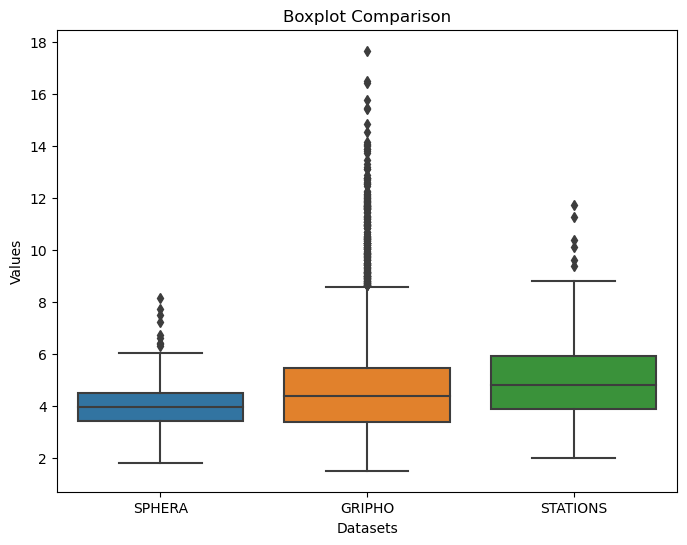

In [54]:
# Combine data into a DataFrame
combined_data = {'Data': ['SPHERA'] * sph_tri.pr.values.reshape(-1).shape[0] +\
                  ['GRIPHO'] * gri_tri.values.reshape(-1).shape[0] +\
                      ['STATIONS'] * q_sta.isel(quantile=0).pr.values.reshape(-1).shape[0],
                 'Value': np.concatenate([sph_tri.pr.values.reshape(-1), gri_tri.values.reshape(-1), q_sta.isel(quantile=0).pr.values.reshape(-1)])}
# Create boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Data', y='Value', data=combined_data)

# Adding title and labels
plt.title('Boxplot Comparison')
plt.xlabel('Datasets')
plt.ylabel('Values')


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5473460850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5473ab82d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5473460110>,
 'medians': [<matplotlib.lines.Line2D at 0x7f54734620d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f54734628d0>,
 'means': []}

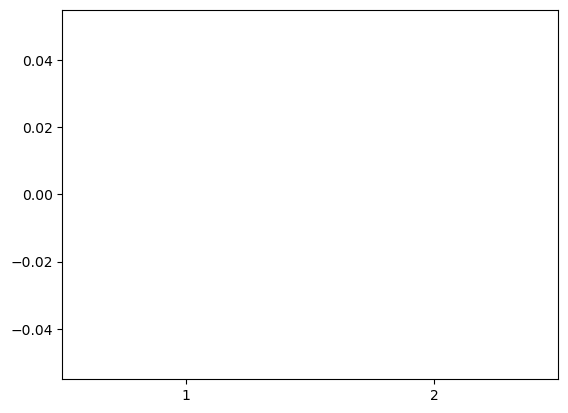

In [12]:
import seaborn as sns
ax=plt.axes()
ax.boxplot([q_sta.pr.values.reshape(-1), gr_n_jja.pr.quantile(dim='time',q=0.999).values.reshape(-1)])


<Axes: >

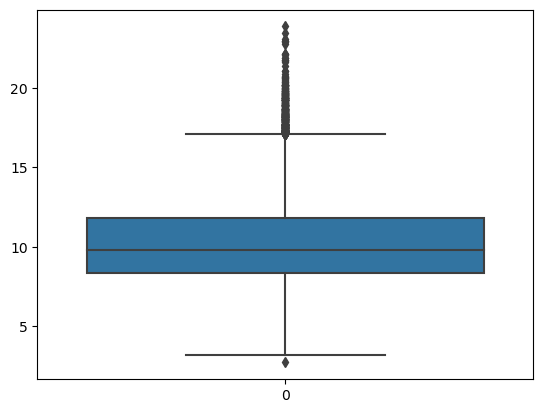

In [8]:
sns.boxplot(gr_n_jja.pr.quantile(dim='time',q=0.999).values.reshape(-1),ax=ax)

In [ ]:

plt.savefig(f"output/GRIPHO_2003.png",dpi=300)  
plt.close()

mask=xr.open_dataset("data/mask_stations_nan_common.nc")
sta_val=xr.open_mfdataset([f"{PATH_COMMON_DATA}/stations/pr/pr_st_{year}.nc" for year in np.arange(2000,2010)]).load()

PATH_COMMON_DATA="/mnt/data/RESTRICTED/CARIPARO/DATA_FPS"
PATH_BIAS_CORRECTED = f"/mnt/data/lcesarini/BIAS_CORRECTED/" 
PATH_COSMO=f"/mnt/data/lcesarini/COSMO/REA_2"

EV= "TOT_PRECIP"

ll_sphera=glob("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/reanalysis/SPHERA/pr/*")


ll_ds=[xr.open_dataset(pth) for pth in ll_sphera[34:]]

ds_concat=xr.concat(ll_ds,dim='time')


hp_sph_all_djf=get_season(ds_concat.sel(time=ds_concat.pr["time.year"].isin(np.arange(2000,2010))),"DJF")
hp_sph_all_mam=get_season(ds_concat,"MAM")
hp_sph_all_jja=get_season(ds_concat,"JJA")
hp_sph_all_son=get_season(ds_concat,"SON")

sph_all_djf=hp_sph_all_djf.quantile(dim='time',q=0.999)
sph_all_mam=hp_sph_all_mam.quantile(dim='time',q=0.999)
sph_all_jja=hp_sph_all_jja.quantile(dim='time',q=0.999)
sph_all_son=hp_sph_all_son.quantile(dim='time',q=0.999)

gripho_djf=xr.open_dataset("/home/lcesarini/2022_resilience/output/DJF/GRIPHO_ORIGINAL_q.nc")
sph_old_djf=xr.open_dataset("/home/lcesarini/2022_resilience/output/DJF/SPHERA_q.nc")
station_djf=xr.open_dataset("/home/lcesarini/2022_resilience/output/DJF/STATIONS_q.nc")

SEASON = ['DJF','MAM','JJA','SON']
plot_panel_rotated(
    figsize=(14,10),ncol=3,nrow=1,
    list_to_plot=[sph_all_djf.pr,
                  sph_djf.pr,station_djf.pr.isel(quantile=0)],
    name_fig="",
    list_titles=[f'Heavy Prec for {seas}' for seas in SEASON],
    levels=[lvl_q for _ in range(3)],
    suptitle="SPHERA 1996-2020",
    name_metric=["Heavy Prec" for _ in range(3)],
    SET_EXTENT=0,
    cmap=[cmap_q for _ in range(3)],
    proj=ccrs.PlateCarree(),
    transform=ccrs.PlateCarree(),
    SAVE=False
)

sph_djf=get_triveneto(sph_old_djf,sta_val)


sphera=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/reanalysis/SPHERA/pr/*1995*")
# stringa=f"{PATH_COSMO}/{EV}/bz2/*bz2*"

# list_files=glob(stringa)

# for file in tqdm(list_files,total=len(list_files)):
#     subprocess.run(f"bzip2 -dk {file}",shell=True)

ds=xr.open_dataset(glob(f"{PATH_COSMO}/{EV}/*.nc")[0])
ds=xr.open_dataset("/mnt/data/lcesarini/COSMO/REA_2/TOT_PRECIP/TOT_PRECIP.2D.201806.grb")


ds.to_netcdf("/mnt/data/lcesarini/COSMO/REA_2/TOT_PRECIP/TOT_PRECIP.2D.201806.nc")


ds.tp.quantile(dim='time',q=0.99).plot()
plt.show()

ds_repro=xr.open_dataset("/mnt/data/lcesarini/tmp/TOT_PRECIP.2D.201806_repro.grb",engine='pynio')

ds_repro['TOT_PREC_GDS0_SFC'.ini]


ds.quantile(q=0.99,dim='time').pr.plot()

ds.attrs.keys()

ds.attrs['Conventions']

ds
ds2=xr.open_dataset("/mnt/data/lcesarini/tmp/prova_cosmo.grb",engine='pynio')
ds2['TOT_PREC_GDS0_SFC']

ax=plt.axes(projection=ccrs.PlateCarree())
(ds2.pr.quantile(q=0.999,dim='time') * 3600).\
    plot(ax=ax,
         cmap='RdYlGn',
         levels=np.arange(2,18,2))
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
plt.show()



ds1=xr.open_dataset(f"{PATH_COSMO}/TOT_PRECIP/TOT_PRECIP.2D.201809.grb",engine="cfgrib")
ds2=xr.open_dataset(f"{PATH_COSMO}/TOT_PRECIP/TOT_PRECIP.2D.201809.grb",engine="pynio")


ds1.drop(["step","surface","valid_time"]).to_netcdf("/mnt/ssd/lcesarini/TOT_PRECIP.2D.201809.nc")

q_99=ds1.tp.quantile(dim='time',q=0.99)
q_99.plot()
plt.show()

# cdo remapycon,/home/lcesarini/2022_resilience/resilience/scripts/newcommongrid.txt /mnt/data/lcesarini/COSMO/REA_2/TOT_PRECIP/TOT_PRECIP.2D.201809.grb /mnt/ssd/lcesarini/TOT_PRECIP.2D.201809_reamp.nc
# cdo remapycon,/home/lcesarini/2022_resilience/resilience/scripts/newcommongrid.txt /mnt/ssd/lcesarini/TOT_PRECIP.2D.201809.nc /mnt/ssd/lcesarini/TOT_PRECIP.2D.201809_reamp.nc

# cdo griddes /mnt/ssd/lcesarini/TOT_PRECIP.2D.201809.nc > target_grid_description.txt




# xx=xr.open_dataset("/mnt/ssd/lcesarini/TOT_PRECIP.2D.201809_reamp.nc",engine='cfgrib')